In [19]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [ ]:
# 🩺 Predicting Medical Conditions from Patient Data

This notebook explores a healthcare dataset to build a classification model that predicts a patient's **medical condition** based on features like age, gender, insurance type, and more.

We will:
- Explore the dataset
- Clean and preprocess the data
- Train a machine learning model
- Evaluate the performance and insights

In [ ]:
## 🔍 Step 1: Load and Explore the Dataset

We start by loading the data and examining its structure and basic statistics.

In [20]:
data=pd.read_csv("/kaggle/input/healthcare-dataset/healthcare_dataset.csv")

In [5]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [22]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [23]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [24]:
# Unique value counts for all columns
data.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [25]:
# Select relevant features and the target column
columns_to_use = [
    'Age', 'Gender', 'Blood Type', 'Insurance Provider',
    'Admission Type', 'Test Results', 'Billing Amount', 'Medical Condition'
]

df_model = data[columns_to_use].copy()

# Preview the data
df_model.head()

,Age,Gender,Blood Type,Insurance Provider,Admission Type,Test Results,Billing Amount,Medical Condition
0,30,Male,B-,Blue Cross,Urgent,Normal,18856.281306,Cancer
1,62,Male,A+,Medicare,Emergency,Inconclusive,33643.327287,Obesity
2,76,Female,A-,Aetna,Emergency,Normal,27955.096079,Obesity
3,28,Female,O+,Medicare,Elective,Abnormal,37909.782410,Diabetes
4,43,Female,AB+,Aetna,Urgent,Abnormal,14238.317814,Cancer


In [ ]:
## 🧼 Step 2: Data Cleaning & Preprocessing

We'll remove negative billing amounts, clean categorical values, and encode features so the model can work with them.

In [27]:
# Remove rows with negative billing amounts
df_model = df_model[df_model['Billing Amount'] >= 0]

In [28]:
df_model['Blood Type'] = df_model['Blood Type'].str.upper().str.strip()
df_model['Blood Type'].value_counts()  # optional: check unique types

Blood Type
A-     6953
A+     6939
AB+    6937
B+     6936
B-     6933
AB-    6929
O+     6905
O-     6860
Name: count, dtype: int64

In [30]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_model, columns=[
    'Gender', 'Blood Type', 'Insurance Provider',
    'Admission Type', 'Test Results'
], drop_first=True)  # drop_first avoids dummy variable trap

# Check the shape of the final DataFrame
df_encoded.head()

,Age,Billing Amount,Medical Condition,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,Blood Type_O+,Blood Type_O-,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Test Results_Inconclusive,Test Results_Normal
0,30,18856.281306,Cancer,True,False,False,False,False,True,False,False,True,False,False,False,False,True,False,True
1,62,33643.327287,Obesity,True,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False
2,76,27955.096079,Obesity,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,28,37909.782410,Diabetes,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False
4,43,14238.317814,Cancer,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
## 🧠 Step 3: Train a Model to Predict Medical Condition

We use a Random Forest Classifier and scale numeric features. Then, we train and evaluate the model.

In [32]:
from sklearn.model_selection import train_test_split

# Separate input features and target
X = df_encoded.drop('Medical Condition', axis=1)
y = df_encoded['Medical Condition']

# Split into train and test sets (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
## 📊 Step 4: Model Evaluation

We'll evaluate the model using accuracy, a confusion matrix, and a classification report to understand performance across classes.

In [33]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale only numeric columns
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [35]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

In [36]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2%}")

Model Accuracy: 26.74%


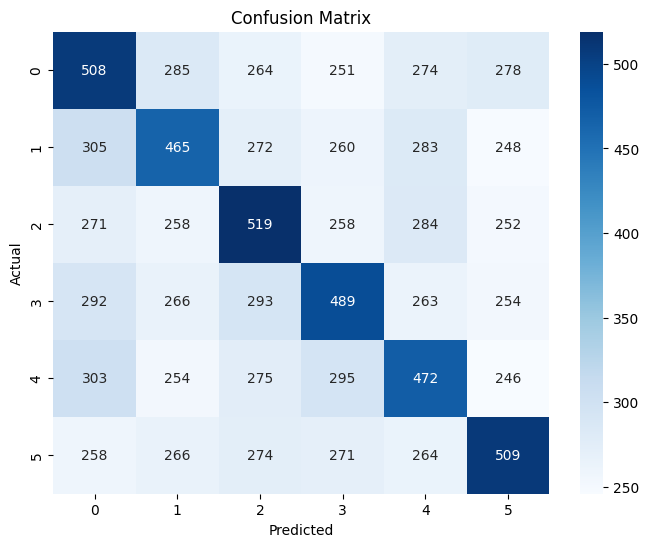

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

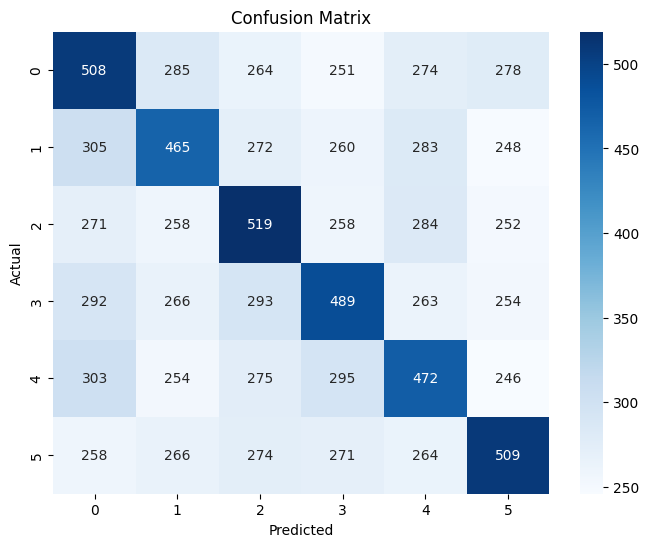

In [38]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
## ✅ Conclusion

- The model was trained on real-world hospital data.
- Predicting medical condition helps understand factors influencing hospital billing and patient care.
- Further improvements could include handling class imbalance or exploring deep learning.

Thanks for reading! 😊